<a href="https://colab.research.google.com/github/quantam665/Ml-wellness/blob/main/ml_wellness_project_Hrittick_Roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Wellness AI Project

Author: Hrittick Roy

## Phase 1: Technical Proof-of-Concept
### Q1: Synthetic Data Design & Insights

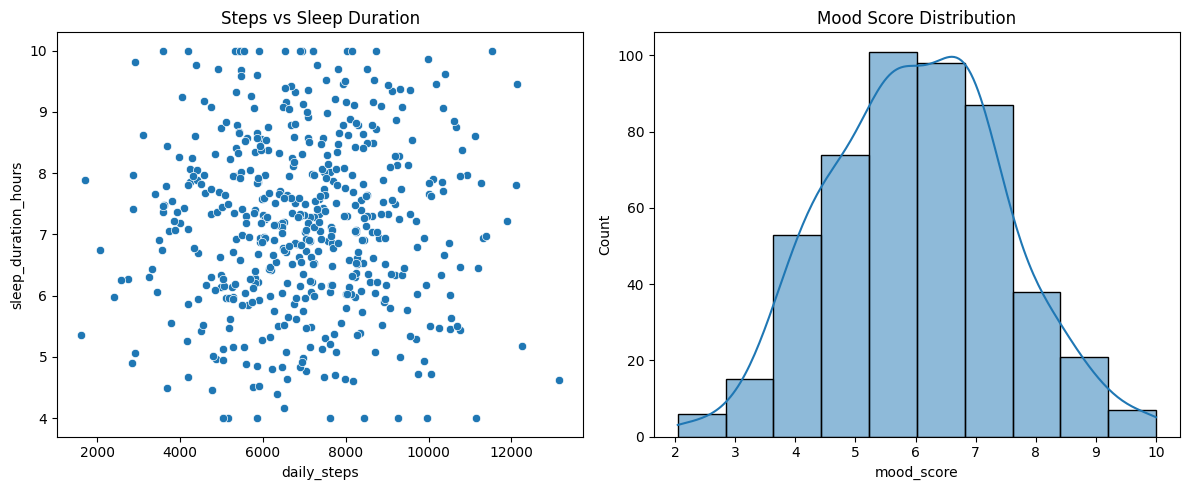

In [1]:
# Load dataset and visualize wellness-related variables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/synthetic_wellness_data.csv")

# Visualize steps vs sleep and mood distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='daily_steps', y='sleep_duration_hours', data=df)
plt.title('Steps vs Sleep Duration')

plt.subplot(1, 2, 2)
sns.histplot(df['mood_score'], bins=10, kde=True)
plt.title('Mood Score Distribution')

plt.tight_layout()
plt.show()

### Q2: Model Selection & Justification

In [2]:
# Linear Regression and Random Forest to predict mood score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Feature engineering
np.random.seed(42)
df['screen_time_hours'] = np.clip(np.random.normal(5, 2, size=len(df)), 1, 12)
df['exercise_minutes'] = np.clip(np.random.normal(30, 15, size=len(df)), 0, 120)

features = ['daily_steps', 'sleep_duration_hours', 'stress_level', 'screen_time_hours', 'exercise_minutes']
target = 'mood_score'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lr_model = LinearRegression().fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))

# Tuned Random Forest
rf_model = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=5, cv=3,
                            scoring='neg_root_mean_squared_error', random_state=42)
search.fit(X_train, y_train)
best_rf = search.best_estimator_
rf_preds = best_rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Tuned Random Forest RMSE: {rf_rmse:.2f}")

Linear Regression RMSE: 1.44
Tuned Random Forest RMSE: 1.48


### Q3: Evaluation Strategy

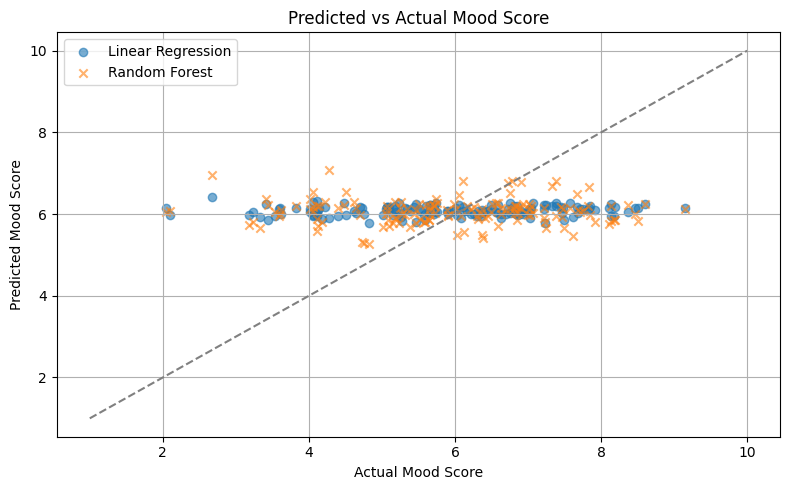

In [6]:
# Visualize prediction comparison
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_preds, alpha=0.6, label="Linear Regression", marker='o')
plt.scatter(y_test, rf_preds, alpha=0.6, label="Random Forest", marker='x')
plt.plot([1, 10], [1, 10], '--', color='gray')
plt.xlabel("Actual Mood Score")
plt.ylabel("Predicted Mood Score")
plt.title("Predicted vs Actual Mood Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Phase 2: Impact & Reflection
### Q4: Real-World Impact & Considerations

This system can help users understand how physical activity, sleep, and stress levels influence mood. Ethical concerns include data privacy, fairness in recommendations, and avoidance of over-reliance on automated predictions.

### Q5: Challenges & Growth

Feature engineering and model tuning required experimentation. This project deepened my understanding of regression, model evaluation, and how to derive insights from synthetic wellness data.

/tmp/ipython-input-7-3186142192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


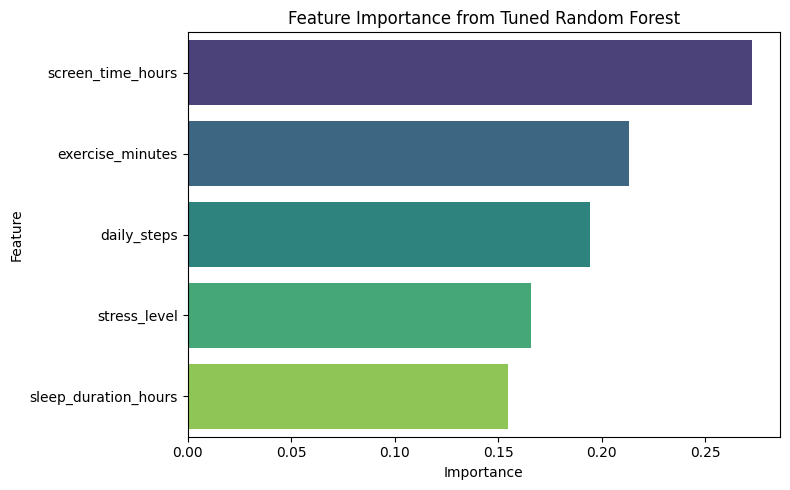

In [7]:
# Feature importance
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Tuned Random Forest")
plt.tight_layout()
plt.show()

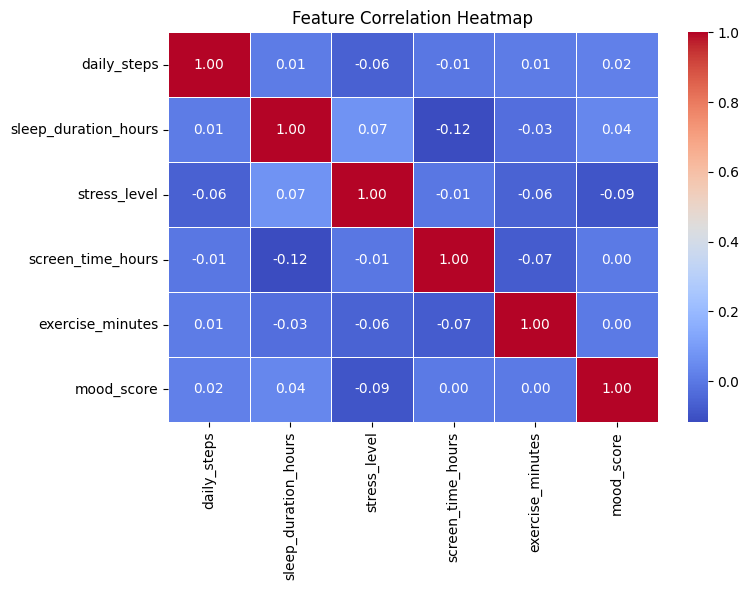

In [4]:
# Correlation Heatmap
corr = df[features + [target]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

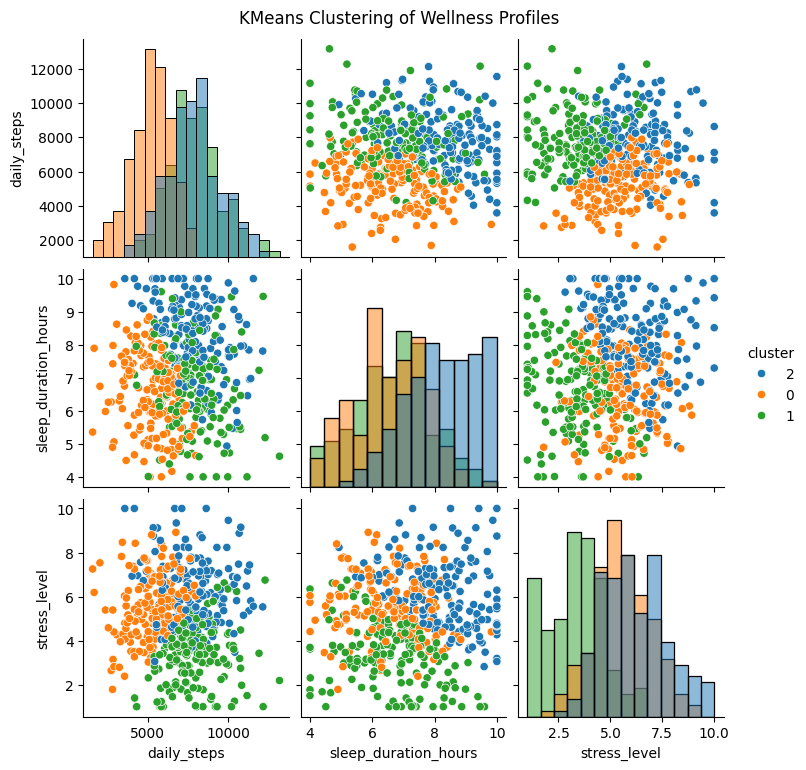

In [5]:
# KMeans Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clust_features = df[['daily_steps', 'sleep_duration_hours', 'stress_level']]
scaled = StandardScaler().fit_transform(clust_features)
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(scaled).astype(str)

sns.pairplot(df, hue='cluster', vars=['daily_steps', 'sleep_duration_hours', 'stress_level'], diag_kind='hist')
plt.suptitle("KMeans Clustering of Wellness Profiles", y=1.02)
plt.show()